<div align="center" id="top">
 <img src="https://github.com/user-attachments/assets/10ba11e4-4ced-400e-a400-ee0f72541780" alt="julep" width="640" height="320" />
</div>

<p align="center">
  <br />
  <a href="https://docs.julep.ai" rel="dofollow">Explore Docs (wip)</a>
  ·
  <a href="https://discord.com/invite/JTSBGRZrzj" rel="dofollow">Discord</a>
  ·
  <a href="https://x.com/julep_ai" rel="dofollow">𝕏</a>
  ·
  <a href="https://www.linkedin.com/company/julep-ai" rel="dofollow">LinkedIn</a>
</p>

<p align="center">
    <a href="https://www.npmjs.com/package/@julep/sdk"><img src="https://img.shields.io/npm/v/%40julep%2Fsdk?style=social&amp;logo=npm&amp;link=https%3A%2F%2Fwww.npmjs.com%2Fpackage%2F%40julep%2Fsdk" alt="NPM Version"></a>
    <span>&nbsp;</span>
    <a href="https://pypi.org/project/julep"><img src="https://img.shields.io/pypi/v/julep?style=social&amp;logo=python&amp;label=PyPI&amp;link=https%3A%2F%2Fpypi.org%2Fproject%2Fjulep" alt="PyPI - Version"></a>
    <span>&nbsp;</span>
    <a href="https://hub.docker.com/u/julepai"><img src="https://img.shields.io/docker/v/julepai/agents-api?sort=semver&amp;style=social&amp;logo=docker&amp;link=https%3A%2F%2Fhub.docker.com%2Fu%2Fjulepai" alt="Docker Image Version"></a>
    <span>&nbsp;</span>
    <a href="https://choosealicense.com/licenses/apache/"><img src="https://img.shields.io/github/license/julep-ai/julep" alt="GitHub License"></a>
</p>

## Task: Browser Use Assistant

### Overview

The Browser Use Assistant is an AI agent that can interact with a web browser to perform tasks on behalf of users. It uses a headless Chrome browser through BrowserBase integration, allowing it to navigate websites, click elements, and type text, all while providing visual feedback through screenshots.

### Task Flow

1. **Session Initialization**
   - Create a Julep session for the AI agent
   - Initialize a BrowserBase browser session
   - Set up connection URLs and debugger access

2. **Browser Setup**
   - Configure browser viewport (1024x768)
   - Initialize with Google homepage
   - Establish CDP (Chrome DevTools Protocol) connection

3. **Interactive Loop**
   - Agent receives user goal
   - Agent plans and executes browser actions
   - Takes screenshots for visual confirmation
   - Evaluates progress towards goal

### Key Features

- **Browser Automation**: Performs web interactions like navigation, clicking, and typing
- **Visual Feedback**: Captures screenshots to verify actions and understand page state
- **Goal-Oriented**: Continues executing actions until the user's goal is achieved
- **Secure Sessions**: Uses BrowserBase for isolated browser instances

### Tools Integration

```yaml
tools:
- BrowserBase Tools
  - create_browserbase_session
  - get_cdp_url
  - get_session_view_urls
  - perform_browser_action
- Julep Tools
  - create_julep_session
  - session_chat
```

### System Capabilities

```plaintext
* Headless Chrome browser interaction
* Browser action execution
* Screenshot-based visual feedback
* Single-tab operation
* Direct browser interaction (no UI controls)
* Text input and navigation
* Click coordination
```

### Flow Diagram

```plaintext
+-------------------+     +----------------------+     +------------------+
|  Session Setup    |     |   Browser Actions    |     |   Goal Check     |
|  - Julep Session  | --> |   - Navigation       | --> |   - Evaluate     |
|  - Browser Session|     |   - Clicking         |     |   - Continue/End |
+-------------------+     |   - Typing           |     +------------------+
                         |   - Screenshots       |
                         +----------------------+
                                   ↑
                                   |
                                   ↓
                         +----------------------+
                         |    Agent Response    |
                         |   - Plan Actions     |
                         |   - Process Results  |
                         +----------------------+
```

## Implementation

To recreate the notebook and see the code implementation for this task, you can access the Google Colab notebook using the link below:

<a target="_blank" href="https://colab.research.google.com/github/julep-ai/julep/blob/dev/cookbooks/06-browser-use.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Additional Information

For more details about the task or if you have any questions, please don't hesitate to contact the author:

**Author:** Julep AI  
**Contact:** [hey@julep.ai](mailto:hey@julep.ai) or  <a href="https://discord.com/invite/JTSBGRZrzj" rel="dofollow">Discord</a>

Installing the Julep Client

In [1]:
!pip install julep -U --quiet

#### NOTE:

- UUIDs are generated for both the agent and task to uniquely identify them within the system.
- Once created, these UUIDs should remain unchanged for simplicity.
- Altering a UUID will result in the system treating it as a new agent or task.
- If a UUID is changed, the original agent or task will continue to exist in the system alongside the new one.

In [2]:
# Global UUID is generated for agent and task
import uuid

AGENT_UUID = uuid.uuid4()
TASK_UUID = uuid.uuid4() 

### Creating Julep Client with the API Key

In [3]:
from julep import Client
import os

api_key = os.getenv("JULEP_API_KEY")

# Create a Julep client
client = Client(api_key=api_key, environment="dev")

## Creating an "agent"


Agent is the object to which LLM settings, like model, temperature along with tools are scoped to.

To learn more about the agent, please refer to the [documentation](https://github.com/julep-ai/julep/blob/dev/docs/julep-concepts.md#agent).

In [4]:
# Defining the agent
name = "Browser Use Assistant"
about = "an assistant that can interact with a web browser to perform tasks on behalf of users."
default_settings = {
    "temperature": 0.7,
    "top_p": 1,
    "min_p": 0.01,
    "presence_penalty": 0,
    "frequency_penalty": 0,
    "length_penalty": 1.0,
    "max_tokens": 150,
}

# Create the agent
agent = client.agents.create_or_update(
    agent_id=AGENT_UUID,
    name=name,
    about=about,
    model="claude-3.5-sonnet-20241022",
)

In [5]:
# Adding the tools to the agent
try:
    client.agents.tools.create(
        agent_id=AGENT_UUID,
        **{
            "name": "computer",
            "type": "computer_20241022",
            "computer_20241022": {
                "display_height_px": 768,
                "display_width_px": 1024,
                "display_number": 1,
            },
        }
    )
except Exception as e:
    print("Already added")

## Defining a Task

Tasks in Julep are Github-Actions-style workflows that define long-running, multi-step actions.

You can use them to conduct complex actions by defining them step-by-step.

To learn more about tasks, please refer to the `Tasks` section in [Julep Concepts](https://github.com/julep-ai/julep/blob/dev/docs/julep-concepts.md#tasks).

In [10]:
import yaml
# please replace the DEMO_API_KEY and DEMO_PROJECT_ID with your own API Key and Project ID of BrowserBase

# Defining the task
task_def = yaml.safe_load('''
name: computer-use-task


########################################################
####################### TOOLS ##########################
########################################################

tools:
- name: create_browserbase_session
  type: integration
  integration:
    provider: browserbase
    method: create_session
    setup:
      api_key: "DEMO_API_KEY"
      project_id: "DEMO_PROJECT_ID"

- name: get_cdp_url
  type: integration
  integration:
    provider: browserbase
    method: get_connect_url
    setup:
      api_key: "DEMO_API_KEY"
      project_id: "DEMO_PROJECT_ID"

- name: get_session_view_urls
  type: integration
  integration:
    provider: browserbase
    method: get_live_urls
    setup:
      api_key: "DEMO_API_KEY"
      project_id: "DEMO_PROJECT_ID"

- name: perform_browser_action
  type: integration
  integration:
    provider: remote_browser
    method: perform_action
    setup:
      width: 1024
      height: 768

- name: create_julep_session
  type: system
  system:
    resource: session
    operation: create

- name: session_chat
  type: system
  system:
    resource: session
    operation: chat

########################################################
################### INPUT SCHEMA #######################
########################################################

input_schema:
  type: object
  properties:
    goal:
      type: string
  required:
    - goal

########################################################
################### MAIN WORKFLOW ######################
########################################################

main:

# Step #0
- tool: create_julep_session
  arguments:
    agent: str(agent.id)
    situation: "''"
    recall: 'False'

# Step #1
- evaluate:
    julep_session_id: _.id

# Step #2
- tool: create_browserbase_session
  arguments:
    project_id: "'c35ee022-883e-4070-9f3c-89607393214b'"

# Step #3
- evaluate:
    browser_session_id: _.id

# Step #4
- tool: get_session_view_urls
  arguments:
    id: _.browser_session_id

# Step #5
- evaluate:
    debugger_url: _.urls.debuggerUrl

# Step #6
- tool: get_cdp_url
  arguments:
    id: outputs[3].browser_session_id

# Step #7
- evaluate:
    connect_url: _.url

# Step #8
# Navigate to google to avoid sending a blank 
# screenshot when computer use starts
- tool: perform_browser_action
  arguments:
    connect_url: _.connect_url
    action: "'navigate'"
    text: "'https://www.google.com'"

# Step #9
- workflow: run_browser
  arguments:
    julep_session_id: outputs[1].julep_session_id
    cdp_url: outputs[7].connect_url
    messages:
    - role: "'user'"
      content: |-
        """
        <SYSTEM_CAPABILITY>
        * You are utilising a headless chrome browser to interact with the internet.
        * You can use the computer tool to interact with the browser.
        * You have access to only the browser.
        * You are already inside the browser.
        * You can't open new tabs or windows.
        * For now, rely on screenshots as the only way to see the browser.
        * You can't don't have access to the browser's UI.
        * YOU CANNOT WRITE TO THE SEARCH BAR OF THE BROWSER.
        </SYSTEM_CAPABILITY>
        <GOAL>
        *""" + inputs[0].goal + NEWLINE + "</GOAL>"
    workflow_label: "'run_browser'" # <----- REMOVE THIS


########################################################
################# RUN BROWSER WORKFLOW #################
########################################################

run_browser:

- tool: session_chat
  arguments:
    session_id: _.julep_session_id
    messages: _.messages
    recall: 'False'

# Evaluate the response from the agent
- evaluate:
    content: _.choices[0].message.content
    tool_calls: "[ \
      { \
        'tool_call_id': tool_call.id, \
        'action': load_json(tool_call.function.arguments)['action'], \
        'text': load_json(tool_call.function.arguments).get('text'), \
        'coordinate': load_json(tool_call.function.arguments).get('coordinate') \
      } \
      for tool_call in _.choices[0].message.tool_calls or [] if tool_call.type == 'function']"


# Perform the actions requested by the agent
- foreach:
    in: _.tool_calls
    do:
      tool: perform_browser_action
      arguments:
        connect_url: inputs[0].cdp_url
        action: _.action if not (str(_.get('text', '')).startswith('http') and _.action == 'type') else 'navigate'
        text: _.get('text')
        coordinate: _.get('coordinate')

# ----------------------------------------------------------------
# Convert the result of the actions into a chat message
# ----------------------------------------------------------------

# Handle image content part
- evaluate:
    contents: "[\
      { \
        'type': 'image_url', \
        'image_url': { \
          'url': result['base64_image'], \
        } \
      } if result['base64_image'] is not None else \
      { \
        'type': 'text', \
        'text': result['output'] if result['output'] is not None else 'done' \
      } \
      for result in _]"

- evaluate:
    messages: "[{'content': [_.contents[i]], 'role': 'tool', 'name': 'computer', 'tool_call_id': outputs[1].tool_calls[i].tool_call_id} for i in range(len(_.contents))]"
# ----------------------------------------------------------------
# Check if the goal is achieved and recursively run the browser
# ----------------------------------------------------------------

- workflow: check_goal_status
  arguments:
    messages: _.messages
    julep_session_id: inputs[0].julep_session_id
    cdp_url: inputs[0].cdp_url
    workflow_label: "'check_goal_status'" 


########################################################
############## CHECK GOAL STATUS WORKFLOW ##############
########################################################

check_goal_status:
- if: len(_.messages) > 0
  then:
    workflow: run_browser
    arguments:
      messages: _.messages
      julep_session_id: _.julep_session_id
      cdp_url: _.cdp_url
      workflow_label: "'run_browser'" 
''')


<span style="color:olive;">Notes:</span>

- The `unwrap: True` in the prompt step is used to unwrap the output of the prompt step (to unwrap the `choices[0].message.content` from the output of the model).


## Creating/Updating a task

In [11]:
# creating the task object
task = client.tasks.create_or_update(
    task_id=TASK_UUID,
    agent_id=AGENT_UUID,
    **task_def,
    extra_body={
        "run_browser": task_def["run_browser"],
        "check_goal_status": task_def["check_goal_status"],
    }
)

## Creating an Execution

An execution is a single run of a task. It is a way to run a task with a specific set of inputs.

In [18]:
execution = client.executions.create(
    task_id=task.id,
     input={
        "agent_id": str(AGENT_UUID),
        "goal": "Navigate to JulepAI's Github repository and tell me the number of stars it has. Remember bro, the link for julep's repository is https://github.com/julep-ai/julep",
        }
)

print("Started an execution. Execution ID:", execution.id)

Started an execution. Execution ID: 513a0e52-2866-4546-883f-6848080aff8f


## Checking execution details and output

There are multiple ways to get the execution details and the output:

1. **Get Execution Details**: This method retrieves the details of the execution, including the output of the last transition that took place.

2. **List Transitions**: This method lists all the task steps that have been executed up to this point in time, so the output of a successful execution will be the output of the last transition (first in the transition list as it is in reverse chronological order), which should have a type of `finish`.


<span style="color:olive;">Note: You need to wait for a few seconds for the execution to complete before you can get the final output, so feel free to run the following cells multiple times until you get the final output.</span>


In [ ]:
import pprint
import time

def reformat_output(output):
    if isinstance(output, dict):
        for key, value in output.items():
            if (key == "base64_image" or key == "url") and value is not None:
                output[key] = value[:20] + '...'
            else:
                output[key] = reformat_output(value)
    elif isinstance(output, list):
        for i, item in enumerate(output):
            output[i] = reformat_output(item)
    return output

counter = 0
while counter < 70:
    transitions = client.executions.transitions.list(execution_id=execution.id).items
    for transition in reversed(transitions):
        print(transition.type)
        output = transition.output
        pprint.pprint(reformat_output(output))
        print("----"*100)
    counter += 1
    time.sleep(3)

Transition type:  init
Transition output:  {'agent_id': 'f1f7e2d1-cf48-4690-a14f-1886fcbdee95', 'goal': "Navigate to JulepAI's Github repository and tell me the number of stars it has. Remember bro, the link for julep's repository is https://github.com/julep-ai/julep"}
--------------------------------------------------
Transition type:  step
Transition output:  {'auto_run_tools': False, 'context_overflow': None, 'created_at': '2024-11-22T07:32:11.893049Z', 'id': '6d257b7c-d3f5-4720-b160-9ec7f012ef9a', 'kind': None, 'metadata': {}, 'render_templates': True, 'situation': '', 'summary': None, 'token_budget': None, 'updated_at': '2024-11-22T07:32:11Z'}
--------------------------------------------------
Transition type:  step
Transition output:  {'julep_session_id': '6d257b7c-d3f5-4720-b160-9ec7f012ef9a'}
--------------------------------------------------
Transition type:  step
Transition output:  {'avgCpuUsage': None, 'contextId': None, 'createdAt': '2024-11-22T07:32:14.722022+00:00', 'end
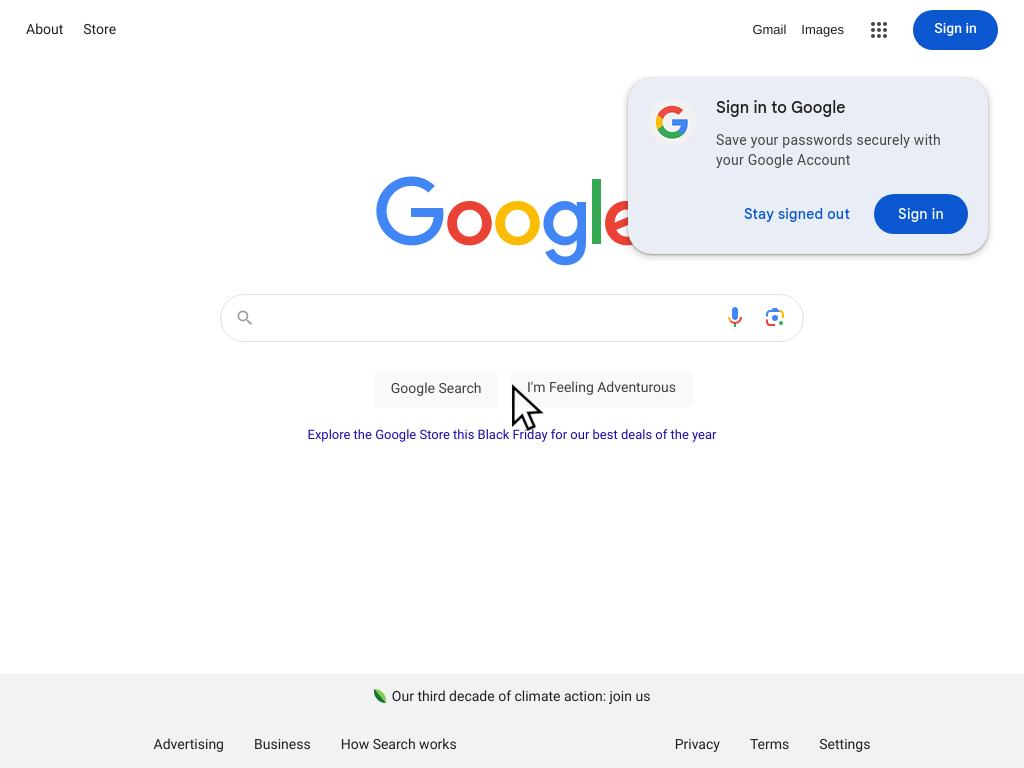
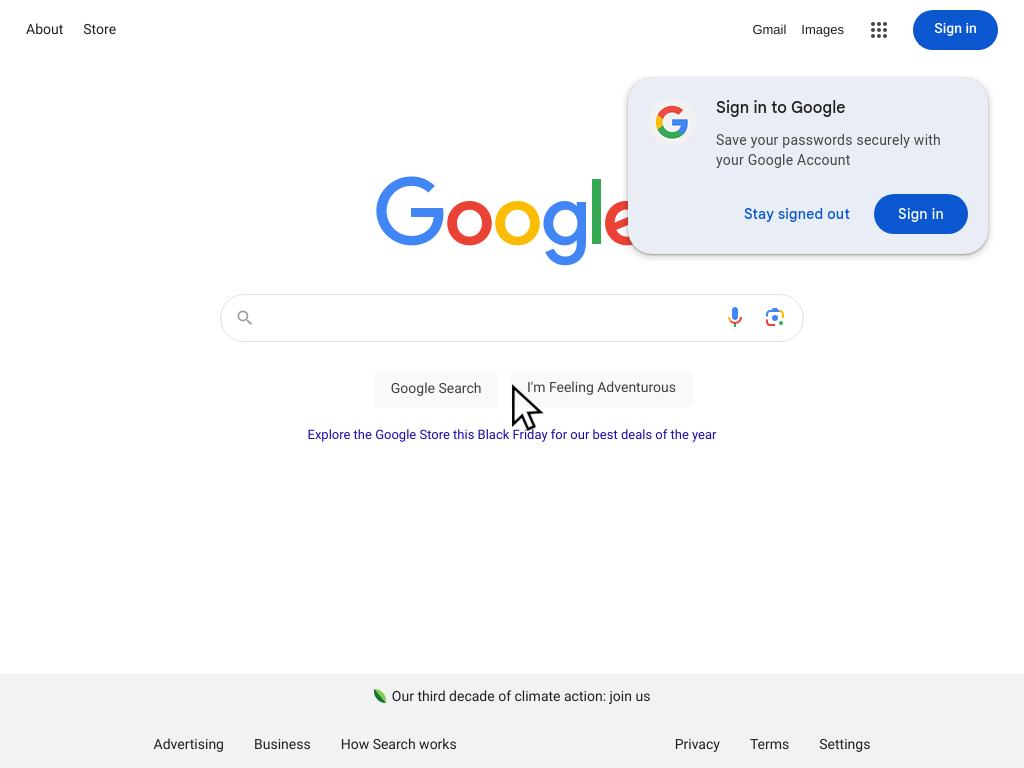
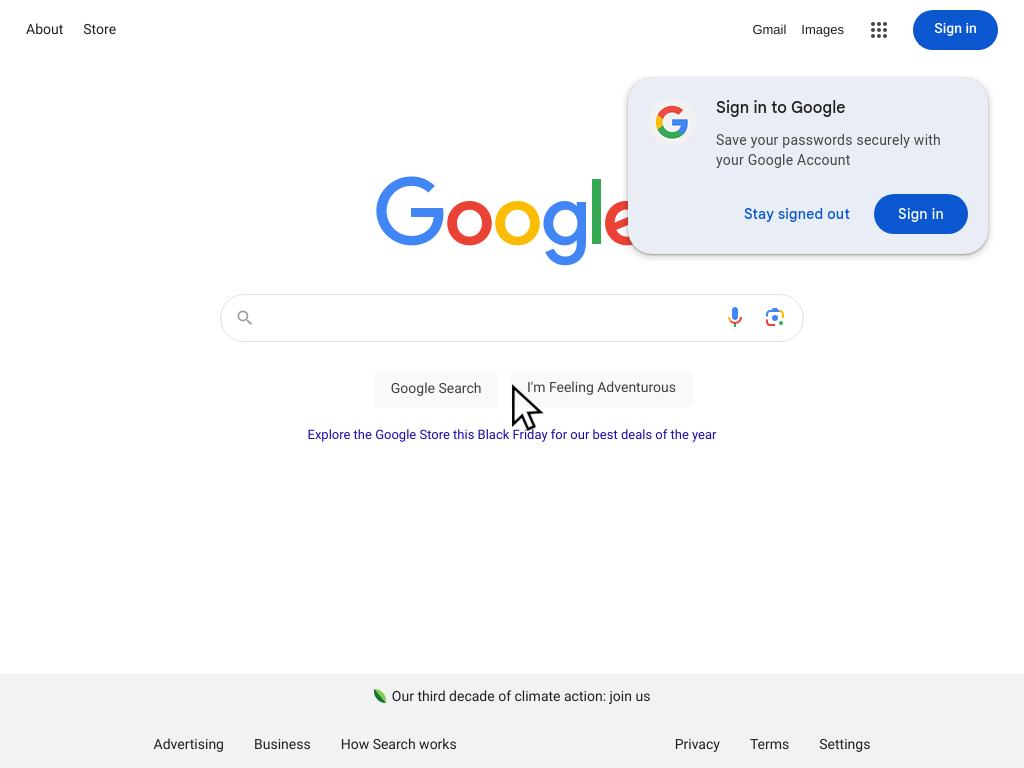
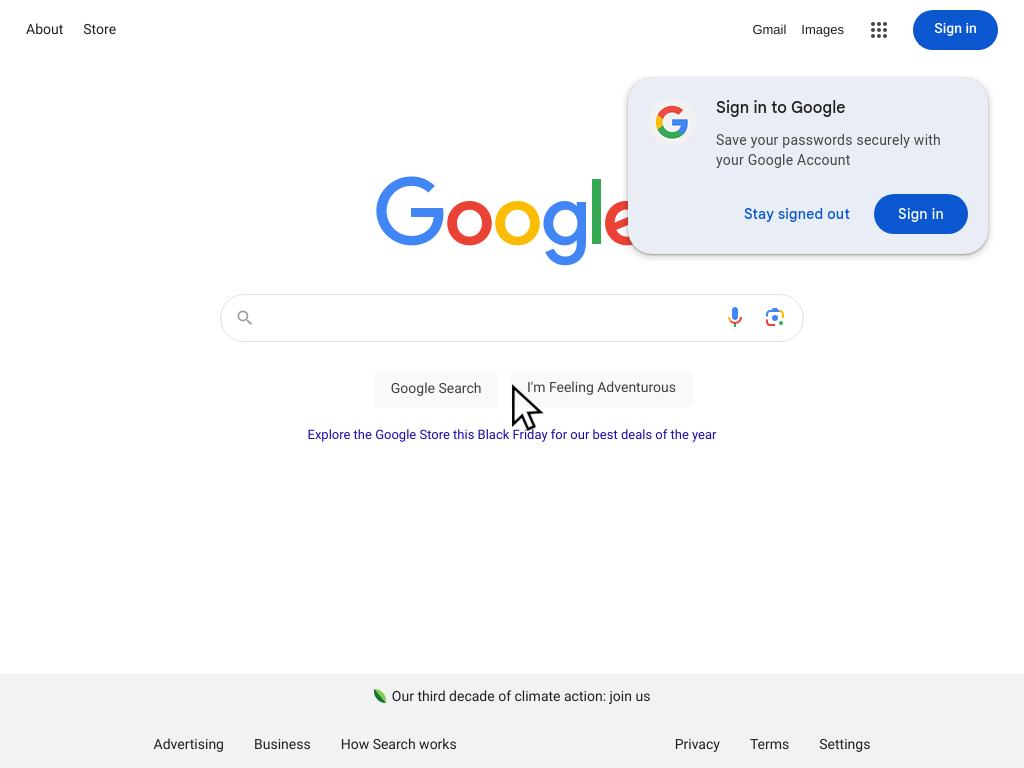
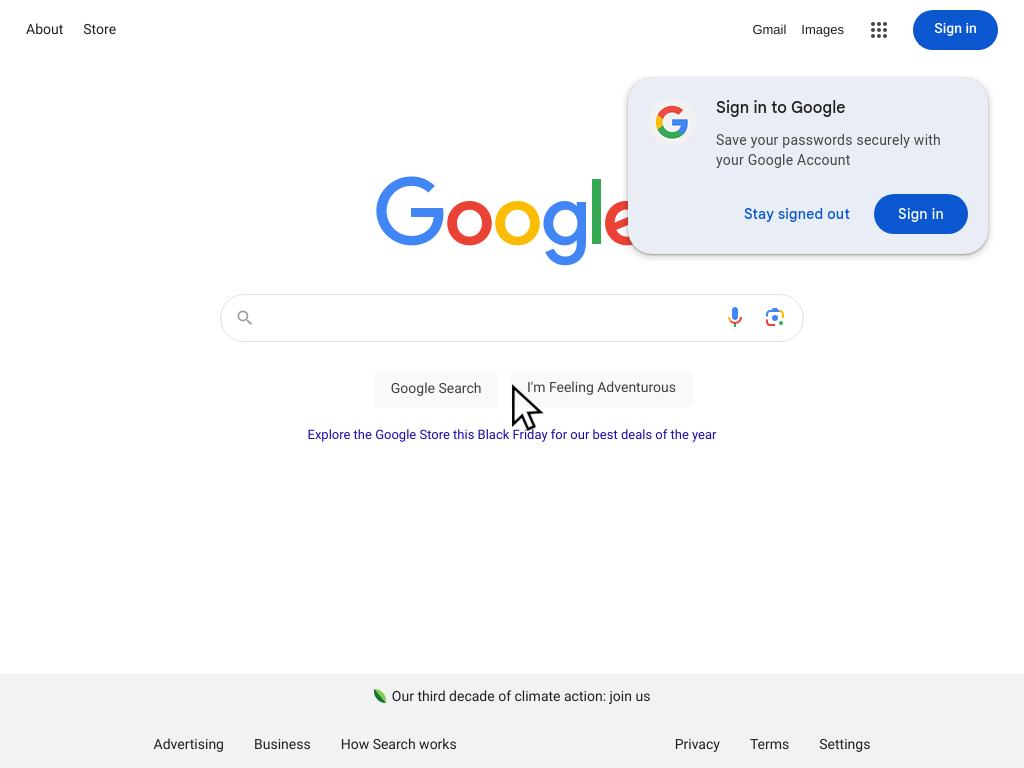
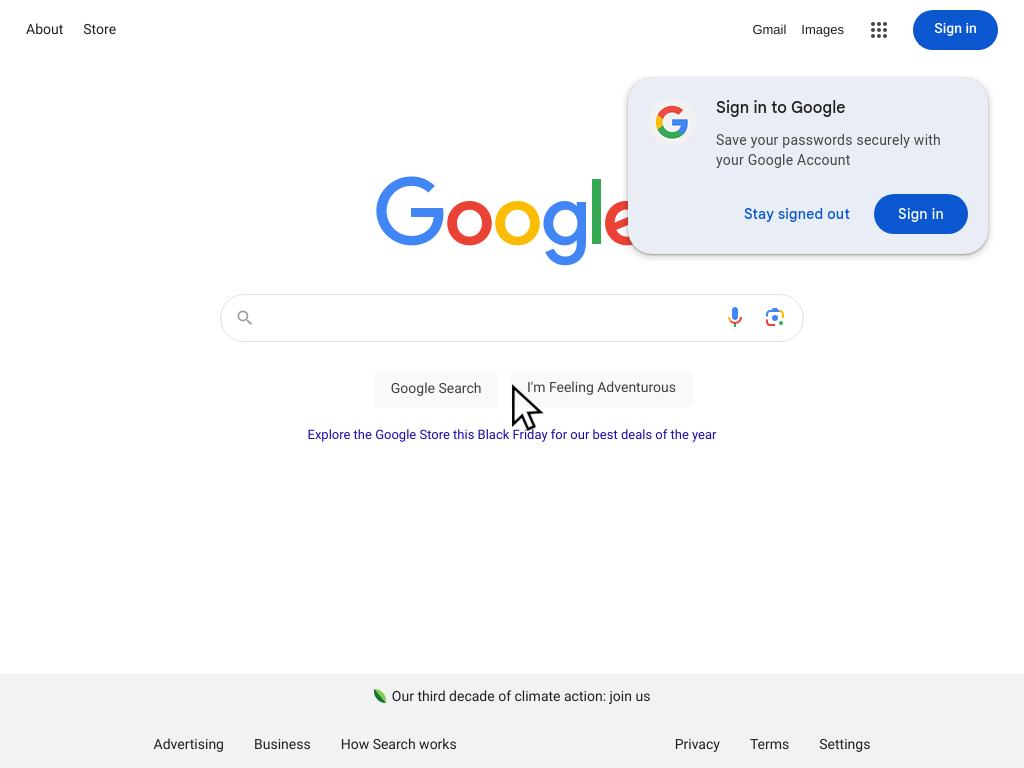
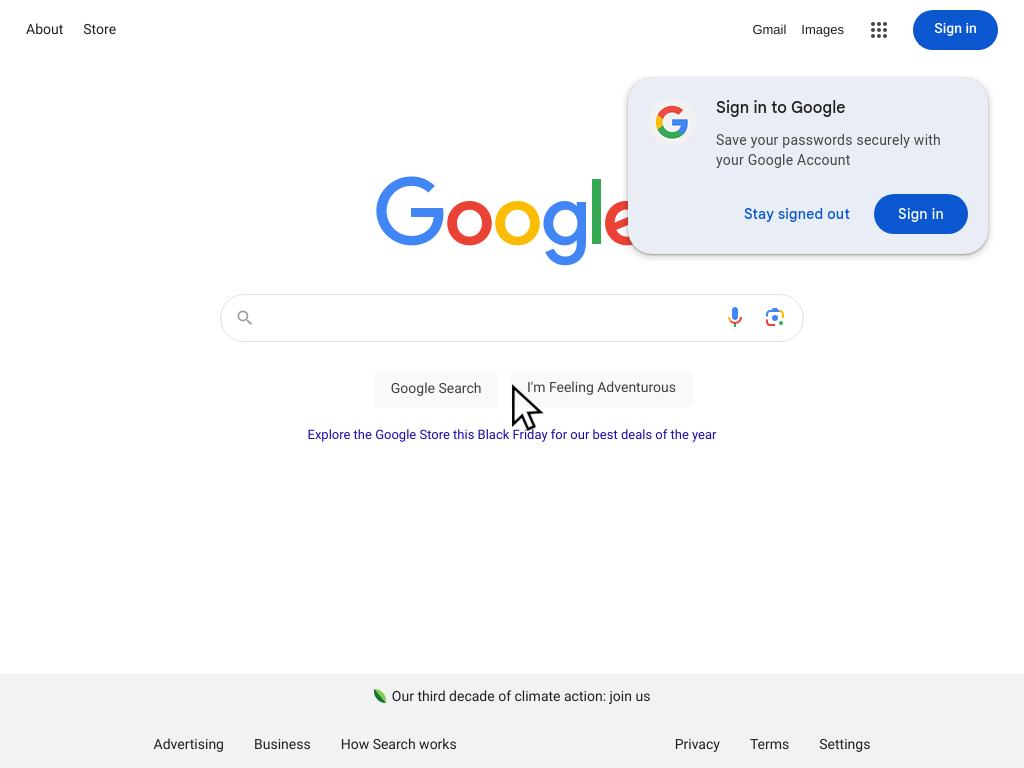
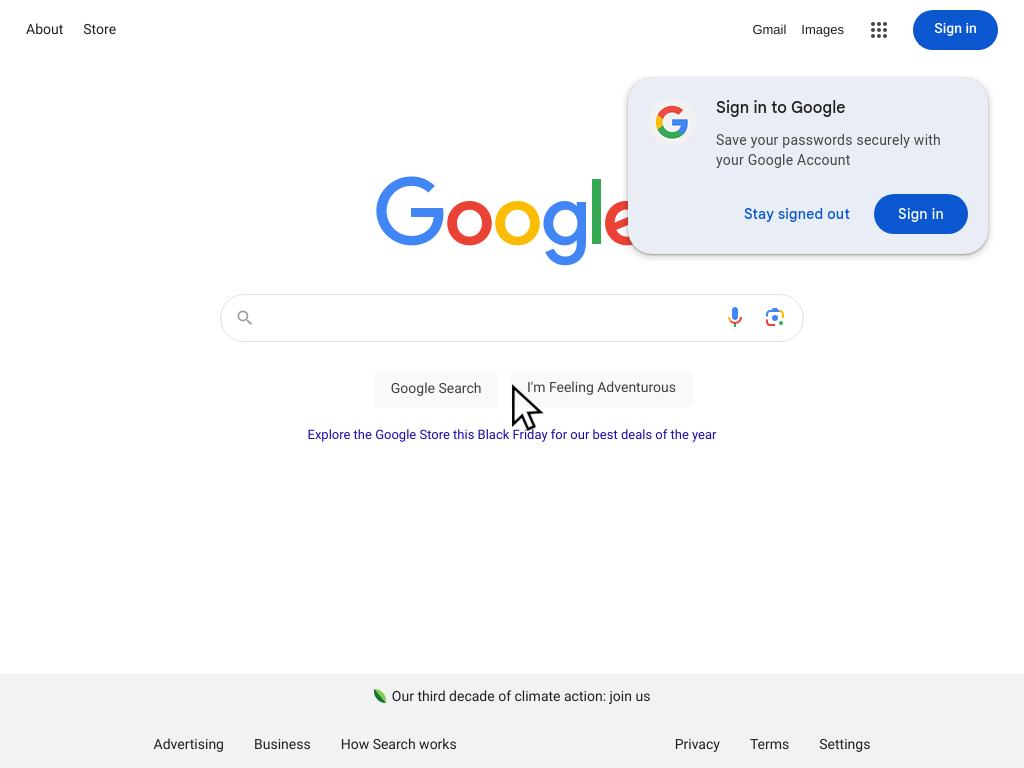

In [19]:
# Lists all the task steps that have been executed up to this point in time
transitions = client.executions.transitions.list(execution_id=execution.id).items

# Transitions are retreived in reverse chronological order
for transition in reversed(transitions):
    print("Transition type: ", transition.type)
    print("Transition output: ", transition.output)
    print("-"*50)